<a id="top"></a>
# Compute Items Features
First:
* [Load Parameters and Items](#load)

Then choose one operation:
* [Compute and Save](#compute)
* [Statistics](#statistics)
* [Plot Item Files](#plot)
* [Computing Test](#test)

## Load Parameters and Items<a id="load"></a>

In [1]:
import json
from utils import load_items

with open('parameters.json', 'r') as infile:
    params = json.load(infile)

RESIZE_X = params['resize']['x']
RESIZE_Y = params['resize']['y']
ITEM_FOLDER = params['item_folder']

items = load_items(ITEM_FOLDER)

## Compute and Save<a id="compute"></a>
Issues:
* remove black color from transparent items, e.g.:
  * poland_spring
  * ...

In [2]:
import cv2, glob
from utils import imread_rgb, imread_gray, compute_colors

def worker(item):
    folder = ITEM_FOLDER + '/' + item + '/'
    files = glob.glob(folder + '*.png')
    for filename in files:
        image_RGB = imread_rgb(filename)
        if not image_RGB is None:
            image_RGB = cv2.resize(image_RGB,(RESIZE_X,RESIZE_Y))
            file_mask = filename[:-4] + '_mask.pgm'
            mask = imread_gray(file_mask)
            hist, cc = compute_colors(image_RGB, mask)
            dominant_colors = {'hist': hist,
                               'cluster_centers': map(lambda t: list(t), cc)}
            with open(filename[:-4] + '_dc.json', 'w') as outfile:
                json.dump(dominant_colors, outfile)

In [3]:
%%time
from multiprocessing import Pool

print('Computing Dominant colors of images')
print('* resized to %d x %d' % (RESIZE_X,RESIZE_Y))
print('* LAB space')
print('* KMeans')
#print('* MiniBatchKMeans')
pool_size = 6
pool = Pool(pool_size)
result = []
for item in items:
    result.append( pool.apply_async(worker, (item,)) )
pool.close()
pool.join()
for r in result:
     r.get()

Computing Dominant colors of images
* resized to 600 x 600
* LAB space
* KMeans
CPU times: user 83.5 ms, sys: 35.4 ms, total: 119 ms
Wall time: 1min 44s


## Statistics???<a id="statistics"></a>

In [12]:
import glob
from utils import ...

item_view = []
VVV = []
for item in items:
    folder = ITEM_FOLDER + '/' + item + '/'
    files = glob.glob(folder + '*_XXX.YYY')
    for filename in files:
        ...
        item_view.append(filename)
        VVV.append(len(des))

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.hist(VVV,bins=60);

In [ ]:
[(ns, str(iv.split('/')[-1][:-9])) for ns, iv in sorted(zip(VVV,item_view), reverse=True) if ns>2000]

In [ ]:
[(ns, str(iv.split('/')[-1][:-9])) for ns, iv in sorted(zip(VVV,item_view), reverse=True) if ns<50]

## Plot File<a id="plot"></a>

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline

In [12]:
import cv2, numpy as np
from ipywidgets import interact
from utils import imread_rgb, plot_colors

def load_and_plot(item,view):
    try:
        prefix = ITEM_FOLDER + '/' + item + '/' + item + '_' + view
        filename = prefix + '.png'
        image_RGB = imread_rgb(filename)
        if not image_RGB is None:
            with open(filename[:-4] + '_dc.json', 'r') as infile:
                dc = json.load(infile)
            hist = dc['hist']
            cc = dc['cluster_centers']
            bar = plot_colors(hist, cc)
            plt.subplot(121); plt.imshow(image_RGB); plt.axis('off');
            plt.subplot(122); plt.imshow(bar); plt.axis('off');
    except (IOError, OSError):
        print('File not found')

[0.5699574183422742, 0.3019888593004258, 0.09130613767640514, 0.03265022577283779, 0.004097358908057067]


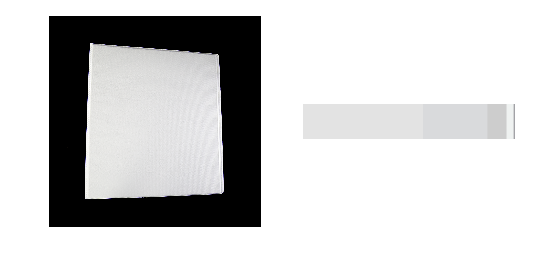

In [6]:
views = ['top_01','top-side_01','top-side_02','bottom_01','bottom-side_01','bottom-side_02']
interact(load_and_plot,item=items,view=views);

### Plot All Items

In [ ]:
for item in items:
    for view in views:
        print(item + '_' + view)
        load_and_plot(item,view)
        plt.show()

## Computing Test<a id="test"></a>

In [7]:
from matplotlib import pyplot as plt
%matplotlib inline

In [10]:
import cv2, numpy as np
from ipywidgets import interact
from utils import imread_rgb, imread_gray, compute_colors, plot_colors

def compute_and_plot(item,view):
    prefix = ITEM_FOLDER + '/' + item + '/' + item + '_' + view
    filename = prefix + '.png'
    image_RGB = imread_rgb(filename)
    if not image_RGB is None:
        image_RGB = cv2.resize(image_RGB,(RESIZE_X,RESIZE_Y))
        filename = prefix + '_mask.pgm'
        mask = imread_gray(filename)
        plt.subplot(121); plt.imshow(image_RGB); plt.axis('off');
        hist, cc = compute_colors(image_RGB, mask)
        bar = plot_colors(hist, cc)
        plt.subplot(122); plt.imshow(bar); plt.axis('off'); plt.title(item + '_' + view);

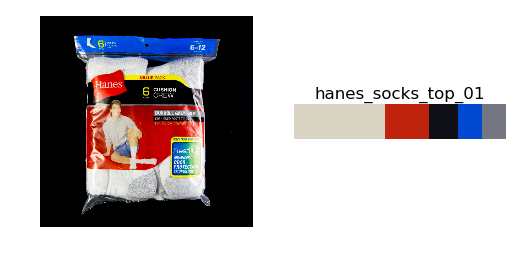

In [11]:
views = ['top_01','top-side_01','top-side_02','bottom_01','bottom-side_01','bottom-side_02']
interact(compute_and_plot,item=items,view=views);

### Compute and Plot All Items

In [ ]:
for item in items:
    for view in views:
        print(item + '_' + view)
        plot(item,view)
        plt.show()

[Top](#top)